In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator, MultipleLocator

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]


In [2]:
global_tick_fontsize = 20
global_label_fontsize = 24
global_annotation_fontsize = 20
global_legend_fontsize = 18

In [3]:
def process_df(df):
    
    print("Before Sampling, each group size:")
    print(df.groupby(['target_percentage', 'select_set']).size() / 7)
    
    number_of_each_group = 10
    target_percentage = "0.01%"
    
    # Filter DataFrame by target_percentage
    df_filtered = df[df['target_percentage'] == target_percentage]
    
    # Group by select_set and get unique envelope values for each group
    unique_envelopes = df_filtered.groupby('select_set')['envelope'].unique().reset_index()
    
    # Rename columns for clarity
    unique_envelopes.columns = ['select_set', 'unique_envelopes']
    
    # print the number of unique envelopes for each group
    # for i in range(number_of_each_group):
    #     print(f"Group {i+1} has {len(unique_envelopes['unique_envelopes'][i])} unique envelopes.")
    
    # Function to sample envelopes
    # def sample_envelopes(envelopes, n):
    #     return list(envelopes.sample(n=min(n, len(envelopes))))
    
    # Apply the sampling to each group
    # unique_envelopes['sampled_envelopes'] = unique_envelopes['unique_envelopes'].apply(lambda x: list(pd.Series(x).sample(number_of_each_group)))
    # # unique_envelopes['sampled_envelopes'] = unique_envelopes['unique_envelopes'].apply(lambda x: sample_envelopes(pd.Series(x), number_of_each_group))
    #
    # # Clean up the DataFrame by dropping the original unique envelopes column
    # for i in range(number_of_each_group):
    #     print(f"Group {i+1} has {len(unique_envelopes['sampled_envelopes'][i])} sampled envelopes.")
    
    unique_envelopes['sampled_envelopes'] = unique_envelopes['unique_envelopes']
    
    # Explode the sampled_envelopes into separate rows
    exploded_unique_envelopes = unique_envelopes.explode('sampled_envelopes')
    
    # Merge the exploded_unique_envelopes back to df_filtered to keep only relevant rows
    filtered_df = df_filtered.merge(exploded_unique_envelopes[['select_set', 'sampled_envelopes']],
                                    left_on=['select_set', 'envelope'],
                                    right_on=['select_set', 'sampled_envelopes'])
    
    # Drop the 'sampled_envelopes' column as it's now redundant
    filtered_df = filtered_df.drop(columns='sampled_envelopes')
    
    print("")
    print(filtered_df.groupby(['target_percentage', 'select_set']).size() / 7)
    
    filtered_df = filtered_df[['select_set', 'test_type', 'query_index_time_elapsed', 'remove_duplication_time_elapsed',
                               'sort_block_metadata_time_elapsed', 'find_optimal_read_solution_time_elapsed',
                               'get_target_data_time_elapsed', 'get_support_data_time_elapsed',
                               'data_calculation_time_elapsed', 'data_apply_select_time_elapsed', 'apply_particle_level_select_array_time_elapsed', 'total_time_elapsed', 'query_result_size', 'chunk_range_size']]
    
    filtered_df['indexing'] = filtered_df['query_index_time_elapsed'] + df['remove_duplication_time_elapsed'] + df['sort_block_metadata_time_elapsed'] + df['find_optimal_read_solution_time_elapsed']
    filtered_df['IO_time'] = filtered_df['get_target_data_time_elapsed'] + df['get_support_data_time_elapsed']
    filtered_df['calculation'] = filtered_df['data_calculation_time_elapsed'] + df['data_apply_select_time_elapsed'] + df['apply_particle_level_select_array_time_elapsed']
    
    filtered_df = filtered_df[['select_set', 'test_type', 'indexing', 'IO_time', 'calculation', 'total_time_elapsed', 'query_result_size', 'chunk_range_size']]
    
    # Group by select_set and test_type, then compute the average value
    averaged_df = filtered_df.groupby(['select_set', 'test_type']).mean().reset_index()
    
    
    # only keep the select_set with specific values: ('ux',),  ('ux','uy'),  ('ux','uy','uz'),  ('ux','uy','uz','x'), ('ux','uy','uz','x','y'), ('ux','uy','uz','x','y','z')
    averaged_df = averaged_df[averaged_df['select_set'].isin(["('ux',)", "('ux','uy')", "('ux','uy','uz')", "('ux','uy','uz','x')", "('ux','uy','uz','x','y')", "('ux','uy','uz','x','y','z')"])]
    
    # a new column to indicate the length of select_set
    averaged_df['select_set_length'] = averaged_df['select_set'].apply(lambda x: len(eval(x)))
    
    # sort by select_set_length
    averaged_df = averaged_df.sort_values('select_set_length')

    return averaged_df


In [4]:
proj_path = "/home/chang/PycharmProjects/gc_openPMD-viewer/"

In [5]:
large_path = proj_path + "results/final/large_2GB.csv"
middle_path = proj_path + "results/final/middle.csv"
small_path = proj_path + "results/final/small.csv"

large_df = pd.read_csv(large_path)
middle_df = pd.read_csv(middle_path)
small_df = pd.read_csv(small_path)


In [6]:
large_df = process_df(large_df)
middle_df = process_df(middle_df)
small_df = process_df(small_df)


# merge the two dataframes, and one column to indicate the size of block
large_df['dataset_size'] = '3'
middle_df['dataset_size'] = '2'
small_df['dataset_size'] = '1'


Before Sampling, each group size:
target_percentage  select_set                  
0.01%              ('ux','uy')                     20.000000
                   ('ux','uy','uz')                11.000000
                   ('ux','uy','uz','x')            16.000000
                   ('ux','uy','uz','x','y')        13.571429
                   ('ux','uy','uz','x','y','z')    33.000000
                   ('ux',)                         10.000000
dtype: float64

target_percentage  select_set                  
0.01%              ('ux','uy')                     20.000000
                   ('ux','uy','uz')                11.000000
                   ('ux','uy','uz','x')            16.000000
                   ('ux','uy','uz','x','y')        13.571429
                   ('ux','uy','uz','x','y','z')    33.000000
                   ('ux',)                         10.000000
dtype: float64
Before Sampling, each group size:
target_percentage  select_set                  
0.01%              ('ux',

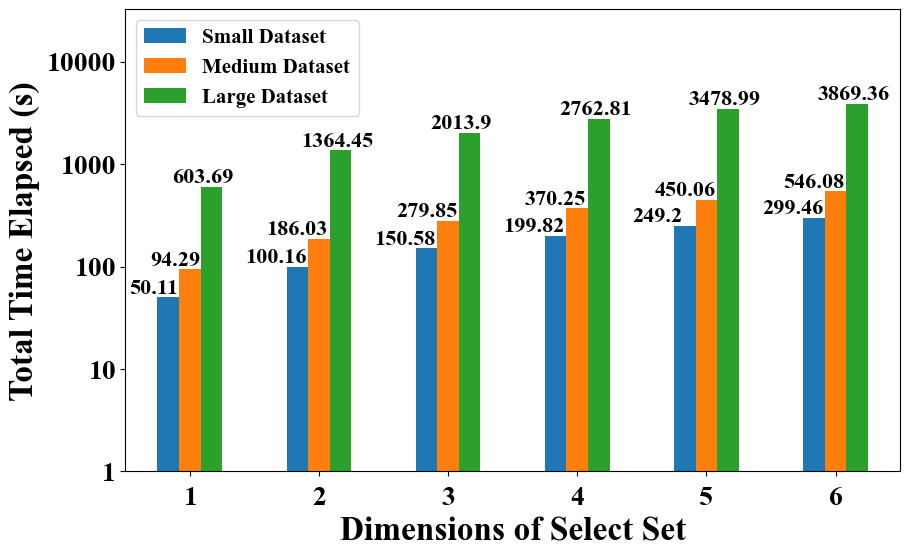

In [13]:

plot_df = pd.concat([small_df, middle_df, large_df])

# plot_df = plot_df.sort_values(['select_set_length', 'block_size'])

plot_df = plot_df[plot_df['test_type'] == 1]

plot_df['total_time_elapsed'] = plot_df['total_time_elapsed'].apply(lambda x: np.log10(x))

# plot total time elapsed in bar
fig, ax = plt.subplots()

# set figure size
fig.set_size_inches(10, 6)

# plot grouped bar chart, x is select_set_length, y is time_elapsed, grouped by test_type
plot_df.pivot(index='select_set_length', columns='dataset_size', values='total_time_elapsed').plot(kind='bar', ax=ax)

legend = ax.legend(title='', loc='upper left', labels=['Small Dataset', 'Medium Dataset', 'Large Dataset'], fontsize=global_legend_fontsize - 3)

for text in legend.get_texts():
    text.set_fontweight('bold')

for i, p in enumerate(ax.patches):
    if i == 0 or i == 6 or i >= 12:
        ax.annotate(str(round(10**p.get_height(), 2)), (p.get_x() - 0.22, p.get_height() + 0.04), fontsize=global_annotation_fontsize - 4, fontweight='bold')
    else:
        ax.annotate(str(round(10**p.get_height(), 2)), (p.get_x() - 0.32, p.get_height() + 0.04), fontsize=global_annotation_fontsize - 4, fontweight='bold')
    
plt.xticks(rotation=0)
# plt y range
plt.ylim(0, 4.51)
# x label
plt.xlabel("Dimensions of Select Set", fontsize=global_label_fontsize, labelpad=5, fontweight='bold')
# y label
plt.ylabel("Total Time Elapsed (s)", fontsize=global_label_fontsize, fontweight='bold')

current_values = plt.gca().get_yticks()
# plt.gca().yaxis.set_major_formatter(FuncFormatter(exp_formatter))
# plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=3))
plt.gca().set_yticklabels([str(int(pow(10, y))) for y in plt.gca().get_yticks()])

# Adjust tick label fontsize
plt.gca().tick_params(axis='y', labelsize=global_tick_fontsize)  # Adjust label size as needed
plt.gca().tick_params(axis='x', labelsize=global_tick_fontsize, pad=7)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')


# Remove the legend
# plt.gca().get_legend().remove()

plt.yticks(fontweight='bold')

plt.savefig(proj_path + "plot/final/all_defaults.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()
print()
